In [8]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# 유틸함수 사용
from marcap_utils import marcap_date
from marcap_utils import marcap_date_range

df = marcap_date_range('2017-01-01', '2018-10-31')

print('row count:', len(df))
df.head()

row count: 1022346


,Code,Name,Close,Changes,ChagesRatio,Volume,Amount,Open,High,Low,Marcap,MarcapRatio,Stocks,ForeignShares,ForeignRatio,Rank,Date
0,005930,삼성전자,1805000.0,3000.0,0.2,93012.0,1.679318e+11,1799000.0,1812000.0,1794000.0,2.539262e+14,16.77,140679337.0,71423750.0,50.77,1.0,2017-01-02
1,000660,SK하이닉스,45800.0,1100.0,2.5,1547681.0,7.074124e+10,44750.0,46000.0,44600.0,3.334251e+13,2.20,728002365.0,373685775.0,51.33,2.0,2017-01-02
2,005380,현대자동차,150000.0,4000.0,2.7,545854.0,8.135673e+10,146000.0,150500.0,145500.0,3.304147e+13,2.18,220276479.0,95830167.0,43.50,3.0,2017-01-02
3,005935,삼성전자우,1440000.0,7000.0,0.5,10822.0,1.556876e+10,1432000.0,1448000.0,1415000.0,2.953933e+13,1.95,20513427.0,15993799.0,77.97,4.0,2017-01-02
4,015760,한국전력공사,43900.0,-150.0,-0.3,745355.0,3.294252e+10,44200.0,44600.0,43850.0,2.818222e+13,1.86,641964077.0,200901131.0,31.29,5.0,2017-01-02


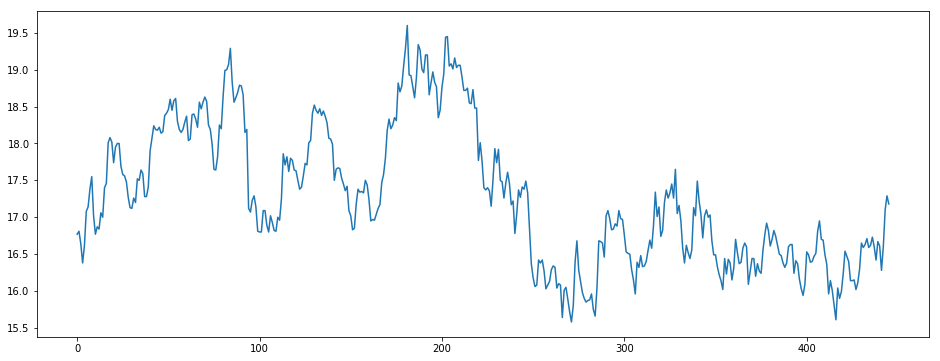

In [9]:
# 삼성전자(005930), 시가총액 비중의 변화
code = '005930'
df_stock = marcap_date_range('2017-01-01', '2018-12-31', code)
df_stock['MarcapRatio'].plot(figsize=(16, 6))

In [4]:
import pandas as pd

# https://github.com/FinanceData/stock_master 종목 마스터
url = 'https://github.com/FinanceData/stock_master/raw/master/stock_master.csv.gz'
df_master = pd.read_csv(url, dtype={'Symbol':str, 'Industy_code':str} )

# 시가총액 데이터 2018-10-30
df_marcap = marcap_date('2018-10-30')

# 시가총액 데이터와 종목 마스터 병합
df_merge = pd.merge(df_marcap[['Code', 'Name', 'Marcap']], df_master[['Symbol', 'Sector']], left_on='Code', right_on="Symbol")

print('row count:', len(df_merge))
df_merge.head(10)

row count: 2208


,Code,Name,Marcap,Symbol,Sector
0,005930,삼성전자,2.718584e+14,005930,통신 및 방송 장비 제조업
1,000660,SK하이닉스,4.964976e+13,000660,반도체 제조업
2,068270,셀트리온,2.827678e+13,068270,기초 의약물질 및 생물학적 제제 제조업
3,207940,삼성바이오로직스,2.633367e+13,207940,기초 의약물질 및 생물학적 제제 제조업
4,051910,LG화학,2.389551e+13,051910,기초 화학물질 제조업
5,005380,현대자동차,2.296933e+13,005380,자동차용 엔진 및 자동차 제조업
6,005490,포스코,2.214546e+13,005490,1차 철강 제조업
7,017670,SK텔레콤,2.172060e+13,017670,전기 통신업
8,028260,삼성물산,2.058137e+13,028260,기타 전문 도매업
9,105560,KB금융,2.038294e+13,105560,기타 금융업


In [5]:
# 섹터별 시가총액
df_sector_corp_marcap = df_merge.groupby('Sector').sum().sort_values('Marcap', ascending=False)[:10]
df_sector_corp_marcap

,Marcap
Sector,
통신 및 방송 장비 제조업,2.888233e+14
기타 금융업,1.717551e+14
기초 의약물질 및 생물학적 제제 제조업,7.051449e+13
반도체 제조업,5.632019e+13
보험업,5.087775e+13
기초 화학물질 제조업,5.004896e+13
기타 화학제품 제조업,4.632344e+13
전기 통신업,3.793525e+13
전자부품 제조업,3.598522e+13


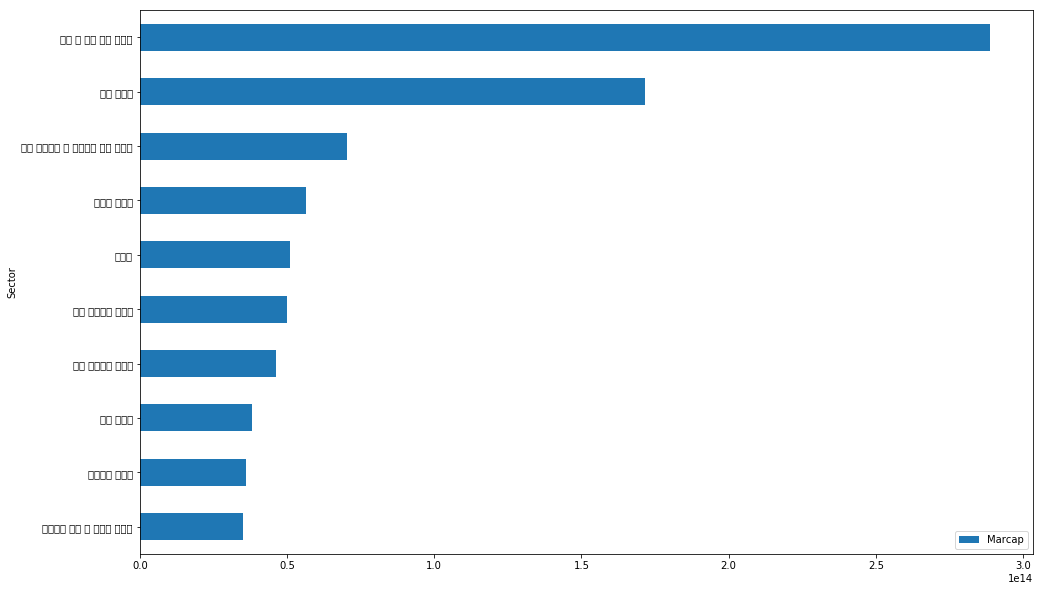

In [10]:
df_sector_corp_marcap[::-1].plot(kind='barh', figsize=(16, 10))

In [11]:
# https://github.com/FinanceData/stock_master
import pandas as pd

url = 'https://github.com/FinanceData/stock_master/raw/master/stock_master.csv.gz'
df_master = pd.read_csv(url, dtype={'Symbol':str, 'Industy_code':str} )
df_master.head(10)

,Symbol,Name,Market,Listing,Industry,Sector,Industy_code,Industy_name
0,001040,CJ,KOSPI,True,지주회사,기타 금융업,64992,지주회사
1,011150,CJ씨푸드,KOSPI,True,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입",기타 식품 제조업,10799,그 외 기타 식료품 제조업
2,012630,HDC,KOSPI,True,"토목공사,건축공사,아파트분양사업,재개발/재건축사업",건물 건설업,4111,주거용 건물 건설업
3,082740,HSD엔진,KOSPI,True,"대형선박용엔진,내연발전엔진",일반 목적용 기계 제조업,29111,내연기관 제조업
4,001390,KG케미칼,KOSPI,True,"콘크리트혼화제, 비료, 친환경농자재, 수처리제",기초 화학물질 제조업,201,기초 화학물질 제조업
5,010060,OCI,KOSPI,True,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매",기초 화학물질 제조업,20129,기타 기초 무기화학 물질 제조업
6,002360,SH에너지화학,KOSPI,True,"합성수지(PS/EPS,ABS수지) 제조",기초 화학물질 제조업,201,기초 화학물질 제조업
7,001740,SK네트웍스,KOSPI,True,"종합무역업(전자전기제품,섬유,에너지화학제품,철강금속제품),의류,수입산합판,MDF판매...",기타 전문 도매업,467,기타 전문 도매업
8,011810,STX,KOSPI,True,"에너지 원료(석탄,석유),산업기자재(기계부품) 도매",상품 종합 도매업,46800,상품 종합 도매업
9,071970,STX중공업,KOSPI,True,"조선기자재, 기계부품, 엔진산업환경발전설비, 플랜트(EPC)",일반 목적용 기계 제조업,29119,기타 기관 및 터빈 제조업


In [12]:
df_master[df_master['Symbol'] == '005930']

,Symbol,Name,Market,Listing,Industry,Sector,Industy_code,Industy_name
355,005930,삼성전자,KOSPI,True,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",통신 및 방송 장비 제조업,32091,금속 가구 제조업


In [13]:
# 시가총액 데이터 2018-10-30
df_marcap = marcap_date('2018-10-30')

# 시가총액
df_merge = pd.merge(df_marcap[['Code', 'Name', 'Marcap']], df_master[['Symbol', 'Sector']], left_on='Code', right_on="Symbol")

print('row count:', len(df_merge))
df_merge.head()

row count: 2208


,Code,Name,Marcap,Symbol,Sector
0,005930,삼성전자,2.718584e+14,005930,통신 및 방송 장비 제조업
1,000660,SK하이닉스,4.964976e+13,000660,반도체 제조업
2,068270,셀트리온,2.827678e+13,068270,기초 의약물질 및 생물학적 제제 제조업
3,207940,삼성바이오로직스,2.633367e+13,207940,기초 의약물질 및 생물학적 제제 제조업
4,051910,LG화학,2.389551e+13,051910,기초 화학물질 제조업


In [14]:
df_sector_corp_counts = df_merge['Sector'].value_counts()[:10]
df_sector_corp_counts

특수 목적용 기계 제조업     122
소프트웨어 개발 및 공급업    119
기타 금융업            113
전자부품 제조업          112
자동차 신품 부품 제조업      91
의약품 제조업            81
기타 화학제품 제조업        76
통신 및 방송 장비 제조업     73
금융 지원 서비스업         58
1차 철강 제조업          55
Name: Sector, dtype: int64

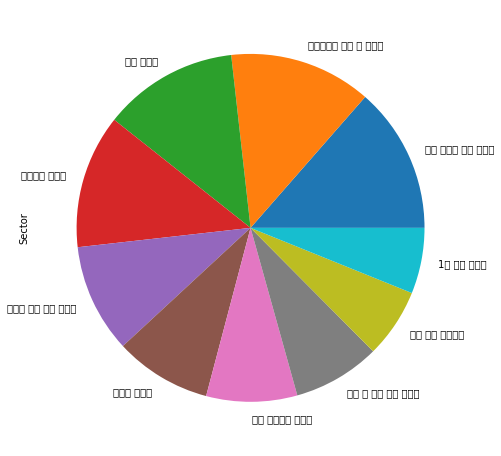

In [15]:
df_sector_corp_counts.plot.pie(figsize=(8, 8))

In [16]:
# 섹터별 시가총액
df_sector_corp_marcap = df_merge.groupby('Sector').sum().sort_values('Marcap', ascending=False)[:20]
df_sector_corp_marcap

,Marcap
Sector,
통신 및 방송 장비 제조업,2.888233e+14
기타 금융업,1.717551e+14
기초 의약물질 및 생물학적 제제 제조업,7.051449e+13
반도체 제조업,5.632019e+13
보험업,5.087775e+13
기초 화학물질 제조업,5.004896e+13
기타 화학제품 제조업,4.632344e+13
전기 통신업,3.793525e+13
전자부품 제조업,3.598522e+13


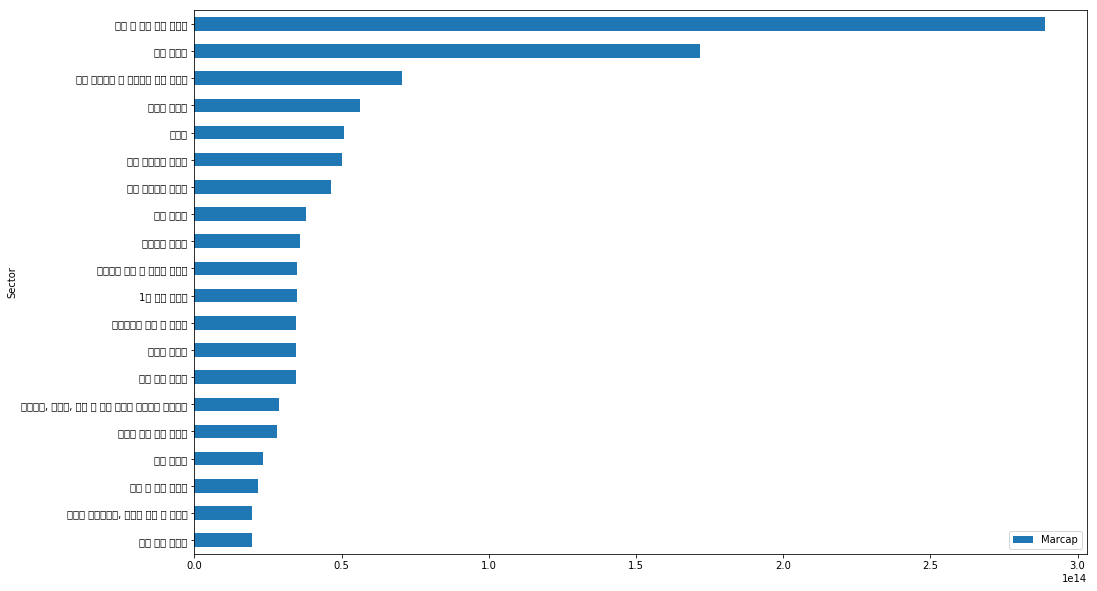

In [17]:
df_sector_corp_marcap[::-1].plot(kind='barh', figsize=(16, 10))

In [18]:
# 2018-10-01
df = marcap_date('2018-10-01')

df['Marcap_trillion'] = df['Marcap'] / 1e12 # 원 단위에서 조(10^12) 단위로 변경
df['Marcap_trillion'].sum()  # 시가총액 전체 (조단위)

1843.5600760536697